In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/zomato.csv.zip')

In [ ]:

# Inspect the dataset
print(df.head())
print(df.describe())

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate votes                             phone  \
0          Yes        Yes  4.1/5   775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5   787                      080 41714161   
2          Yes         No  3.8/5   918                    +91 9663487993   
3           No         No  3.7/5    88                    +91 9620009302   
4           No         No  3.8/5   166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casua

In [ ]:
# Descriptive statistics
print(df.describe())


              address           name online_order book_table   rate  votes  \
count           56235          56236        56233      56194  48414  56174   
unique          13397          11914         2639       2902   2877   5195   
top      ('Rated 4.0'   ('Rated 4.0'          Yes         No    NEW      0   
freq              942            300        30444      45268   2208  10027   

                phone location    rest_type     dish_liked      cuisines  \
count           54956    56126        55914          28027         56049   
unique          17712     2920         2961           8067          5553   
top      ('Rated 4.0'      BTM  Quick Bites   ('Rated 4.0'  North Indian   
freq              412     5125        19132            407          2913   

       approx_cost(for two people) listed_in(type)  
count                        55731           51642  
unique                        2879            2783  
top                            300        Delivery  
freq            

In [ ]:
# Print out ALL column names
print("Available Columns:")
print(df.columns.tolist())


Available Columns:
['address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)']


In [ ]:
 # Display basic information about the dataset
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object

In [ ]:
 # Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64


In [ ]:
def create_robust_visualizations(df):
    """
    Create visualizations with flexible column handling
    """
    plt.figure(figsize=(20, 15))

    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns


In [ ]:
 # Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [ ]:
 # 1. Distribution of Rate (if column exists)
rate_cols = [col for col in numeric_cols if 'rat' in col.lower()]
if rate_cols:
        rate_col = rate_cols[0]
        plt.subplot(2, 3, 1)
        df[rate_col].hist(bins=20, edgecolor='black')
        plt.title(f'Distribution of {rate_col}')
        plt.xlabel('rate ')
        plt.ylabel('Frequency')

    # ... (Rest of the visualization code) ...

# Call the function with your DataFrame
create_robust_visualizations(df)

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 0, 'rate')

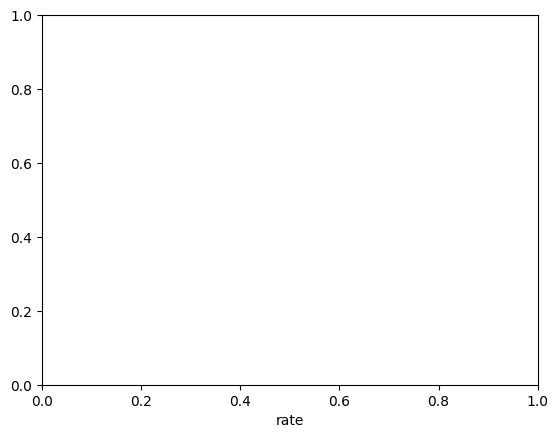

In [ ]:
 plt.xlabel('rate')

Text(0, 0.5, 'Frequency')

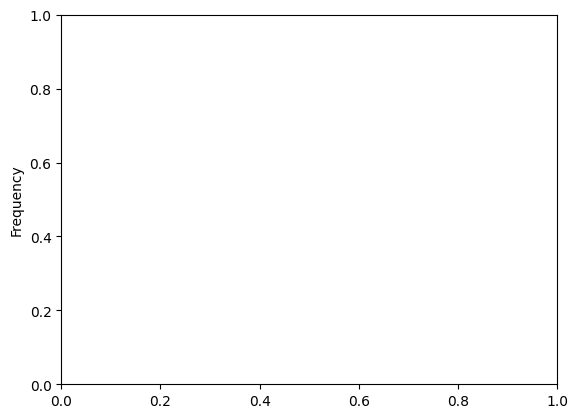

In [ ]:
 plt.ylabel('Frequency')

In [ ]:
 # 2. Cost Distribution (find cost-related column)
phone_cols = [col for col in numeric_cols if 'phone' in col.lower() or 'price' in col.lower()]
if phone_cols:
        phone_col = phone_cols[0]
        plt.subplot(3, 3, 2)
        df[phone_col].hist(bins=20, edgecolor='black')
        plt.title(f'Distribution of {phone_col}')
        plt.xlabel('phone')
        plt.ylabel('Frequency')


Text(0.5, 0, 'phone')

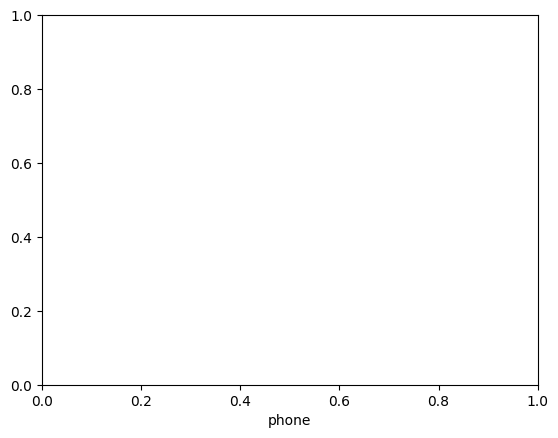

In [ ]:
 plt.xlabel('phone')

Text(0, 0.5, 'Frequency')

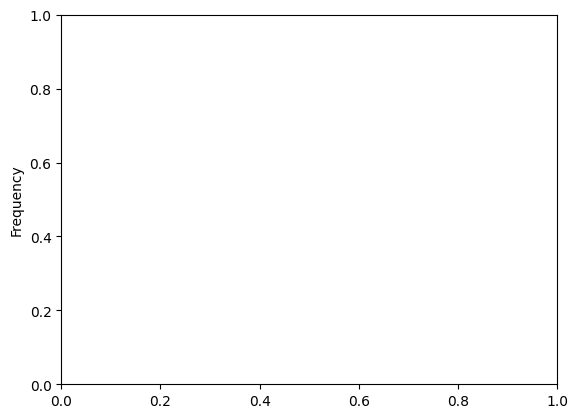

In [ ]:
plt.ylabel('Frequency')

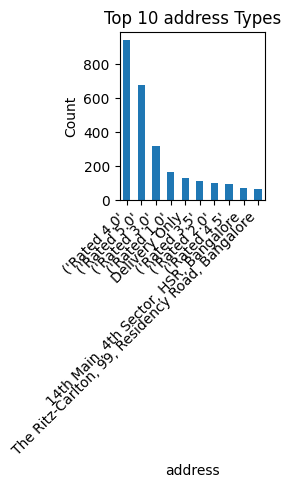

In [ ]:
 # 3. Top Categorical Column Distribution
if categorical_cols.any():
        plt.subplot(2, 3, 3)
        df[categorical_cols[0]].value_counts().head(10).plot(kind='bar')
        plt.title(f'Top 10 {categorical_cols[0]} Types')
        plt.xlabel(categorical_cols[0])
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

In [ ]:
# 4. Scatter Plot (if we have two numeric columns)
if len(numeric_cols) >= 2:
        plt.subplot(2, 3, 4)
        plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.5)
        plt.title(f'{numeric_cols[0]} vs {numeric_cols[1]}')
        plt.xlabel(numeric_cols[0])
        plt.ylabel(numeric_cols[1])


In [ ]:
 # 5. Correlation Heatmap
if len(numeric_cols) > 1:
        plt.subplot(2, 3, 5)
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

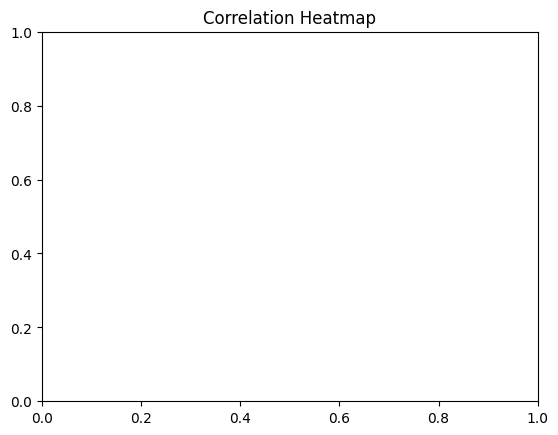

In [ ]:
 plt.title('Correlation Heatmap')